<a href="https://colab.research.google.com/github/CristianoCoelhoSilva/Pesquisas/blob/main/Covid/Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Feature selection is the process of choosing a subset of relevant features (variables, attributes) for use in model construction. In machine learning, especially when working with datasets that have many features, selecting the right features can improve the model's performance, reduce overfitting, and decrease the computational cost.

In [49]:
import numpy as np
import pandas as pd

import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#Arquivo completo
df = pd.read_csv(r"https://raw.githubusercontent.com/CristianoCoelhoSilva/Pesquisas/main/Covid/Data/covid_estabelecimento.csv")

#Removendo as colunas
df.drop(["GENERO","RACA","MES","NUMERO","SEMANA","NUMERO_ENTREVISTA","NUMERO_ORDEM","UF","SITUACAO","DOMICILIO","RESPONDEU","ESCOLARIDADE","ESTABELECIMENTO"], axis="columns", inplace=True)
df.drop(["B006"], axis="columns", inplace=True)


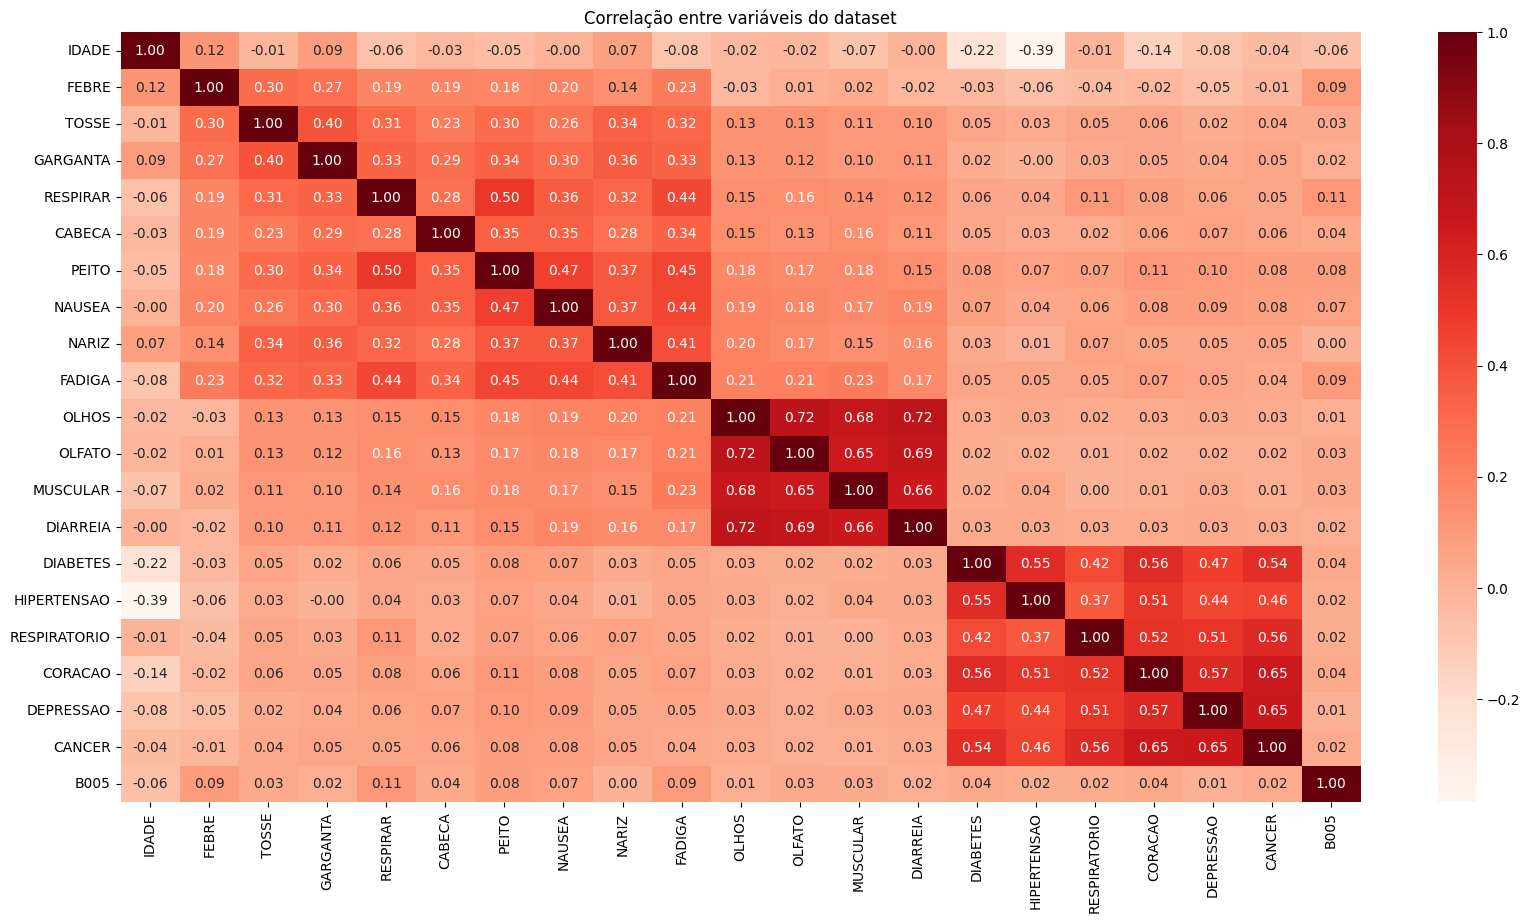

In [50]:
import matplotlib.pyplot as plt
import seaborn


a4_dims = (20, 10)
fig, ax = plt.subplots(figsize=a4_dims)

seaborn.heatmap(df.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Reds')
plt.title('Correlação entre variáveis do dataset')
plt.show()

**Preparing Data**

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 13): This is a key step. It uses the train_test_split function to divide the data into training and testing sets.

    X and y are the features and target variable, respectively.

    test_size = 0.3 means 30% of the data will be used for testing, and the remaining 70% for training.

    random_state = 13 ensures that the data is split in a reproducible way.
    
    Every time you run the code with this random_state, you'll get the same split.



In [51]:
X = df.drop(['B005'], axis = "columns")
y = df.B005

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 13)

X_train

,IDADE,FEBRE,TOSSE,GARGANTA,RESPIRAR,CABECA,PEITO,NAUSEA,NARIZ,FADIGA,OLHOS,OLFATO,MUSCULAR,DIARREIA,DIABETES,HIPERTENSAO,RESPIRATORIO,CORACAO,DEPRESSAO,CANCER
7820,50,1,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,2,1
3240,43,2,1,2,2,1,2,2,1,1,2,2,1,2,2,2,1,2,1,2
3177,36,1,1,2,1,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2
4648,40,1,1,1,1,1,1,1,2,1,1,1,1,1,2,2,2,2,2,2
11513,10,1,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10982,27,1,1,2,2,1,2,2,2,2,2,1,1,2,2,2,2,2,2,2
7696,46,2,2,2,2,2,2,2,2,1,2,1,1,1,2,1,2,2,2,2
74,35,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,2
14512,58,1,1,1,1,1,2,2,2,1,1,2,1,2,1,1,2,2,2,2



**Model Training and Feature Importance**





In [52]:

# This section creates a preprocessing pipeline using make_column_transformer. It applies different transformations to numerical and categorical features:
encoder_imputer_scaled_transformer = make_column_transformer(
    (make_pipeline(
        (KNNImputer(n_neighbors = 3)),
        (StandardScaler())
    ) , make_column_selector(dtype_include = np.number)),
    (make_pipeline(
        SimpleImputer(strategy = 'most_frequent'),
        OneHotEncoder(handle_unknown = 'ignore'),
    ), make_column_selector(dtype_exclude = np.number)),
    remainder = 'passthrough'
)

encoder_imputer_scaled_transformer.fit(X_train) #Fits the preprocessing pipeline to the training data.

X_train_processed = encoder_imputer_scaled_transformer.transform(X_train) #Applies the transformations to the training data and stores the result in X_train_processed.
X_test_processed = encoder_imputer_scaled_transformer.transform(X_test) #Applies the same transformations to the testing data and stores the result in X_test_processed.

model  = RandomForestClassifier() #RandomForestClassifier(): Creates a RandomForestClassifier model instance.
model.fit(X_train_processed, y_train) # model.fit(X_train_processed, y_train): Trains the model using the preprocessed training data and target variables.
model.feature_importances_ #Accesses the feature importances calculated by the RandomForest model. This provides insights into which features were most influential in the model's predictions.

array([0.45985392, 0.02175871, 0.04065888, 0.03998886, 0.02075497,
       0.03993466, 0.02567017, 0.02706774, 0.03878591, 0.02725078,
       0.03579541, 0.02860429, 0.0358491 , 0.03398076, 0.02155762,
       0.0252826 , 0.02843175, 0.01628635, 0.02274505, 0.00974245])

Text(0.5, 1.0, 'Importância de cada feature')

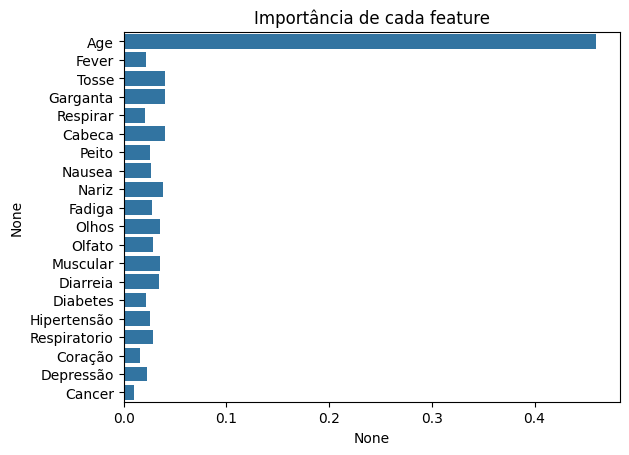

In [53]:
importances = pd.Series(data=model.feature_importances_, index=name)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')